In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")

In [2]:
df = pd.read_csv("Listings.csv", encoding='latin1', low_memory=False)
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (279712, 33)


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [3]:
# Basic info about data types and null values
df.info()

df.describe()

# Check for missing values
df.isnull().sum().sort_values(ascending=False).head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

district                       242700
host_response_time             128782
host_response_rate             128782
host_acceptance_rate           113087
review_scores_value             91785
review_scores_location          91775
review_scores_checkin           91771
review_scores_accuracy          91713
review_scores_communication     91687
review_scores_cleanliness       91665
dtype: int64

In [5]:
# Drop irrelevant columns
df['price'] = df['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Convert 'host_since' to datetime
df['host_since'] = pd.to_datetime(df['host_since'], errors='coerce')

# Fill numeric NaNs with median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


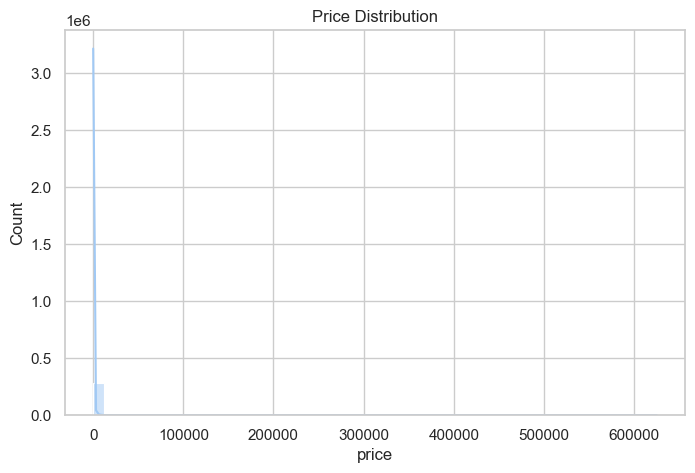

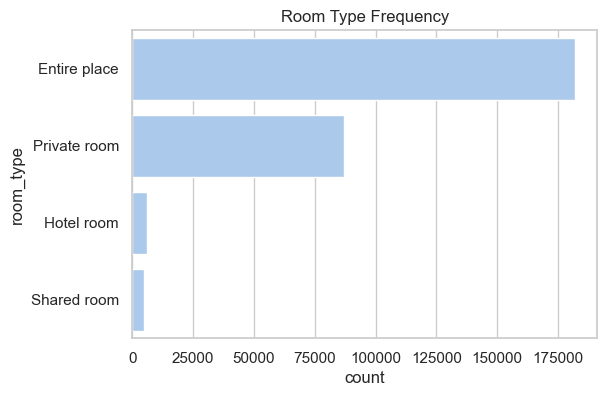

In [6]:
# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Price Distribution")
plt.show()

# Room type counts
plt.figure(figsize=(6,4))
sns.countplot(y='room_type', data=df)
plt.title("Room Type Frequency")
plt.show()


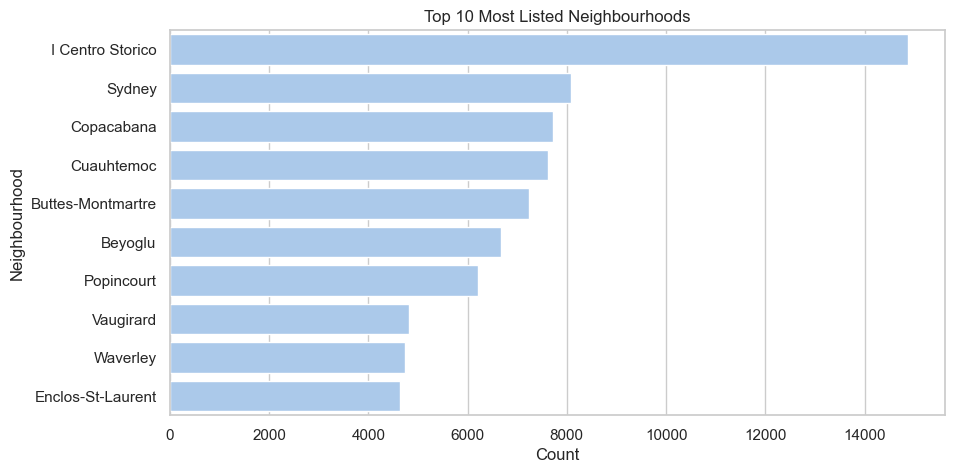

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(y='neighbourhood', data=df, order=df['neighbourhood'].value_counts().index[:10])
plt.title("Top 10 Most Listed Neighbourhoods")
plt.xlabel("Count")
plt.ylabel("Neighbourhood")
plt.show()

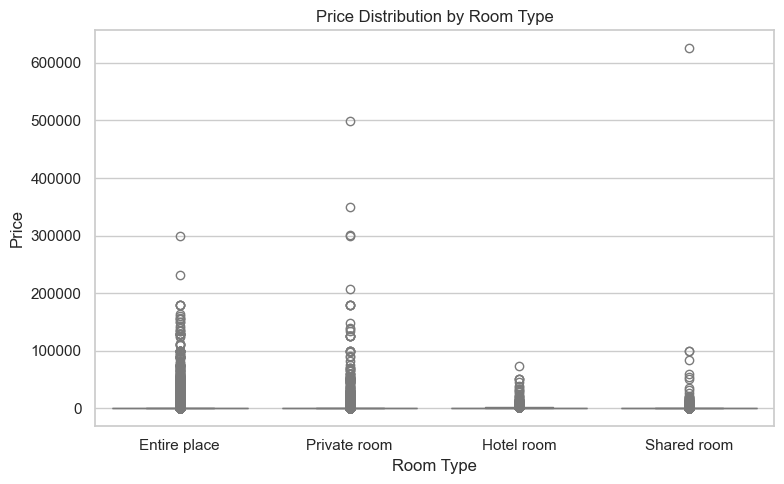

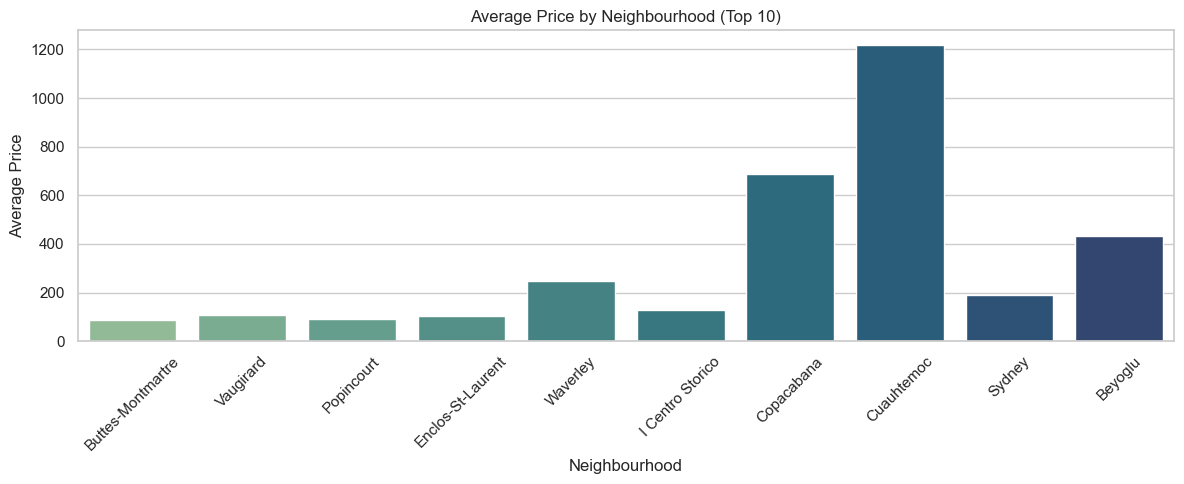

In [12]:
# 1️⃣ Price Distribution by Room Type
plt.figure(figsize=(8,5))
sns.boxplot(x='room_type', y='price', data=df)
plt.title("Price Distribution by Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

# 2️⃣ Average Price by Top 10 Neighbourhoods (auto-detects the column)
neigh_col = None
for col in ['neighbourhood', 'neighborhood', 'neighbourhood_cleansed', 'district', 'city']:
    if col in df.columns:
        neigh_col = col
        break

if neigh_col:
    plt.figure(figsize=(12,5))
    top_neigh = df[neigh_col].value_counts().index[:10]
    sns.barplot(
        x=neigh_col,
        y='price',
        hue=neigh_col,        # added to avoid warning
        data=df[df[neigh_col].isin(top_neigh)],
        estimator='mean',
        errorbar=None,
        palette="crest",
        legend=False          # hide the redundant legend
    )
    plt.xticks(rotation=45)
    plt.title(f"Average Price by {neigh_col.capitalize()} (Top 10)")
    plt.xlabel(neigh_col.capitalize())
    plt.ylabel("Average Price")
    plt.tight_layout()
    plt.show()
else:
    print("No neighbourhood-like column found in dataset.")


In [18]:
print(df.columns.tolist())


['listing_id', 'name', 'host_id', 'host_since', 'host_location', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'district', 'city', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bedrooms', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable']


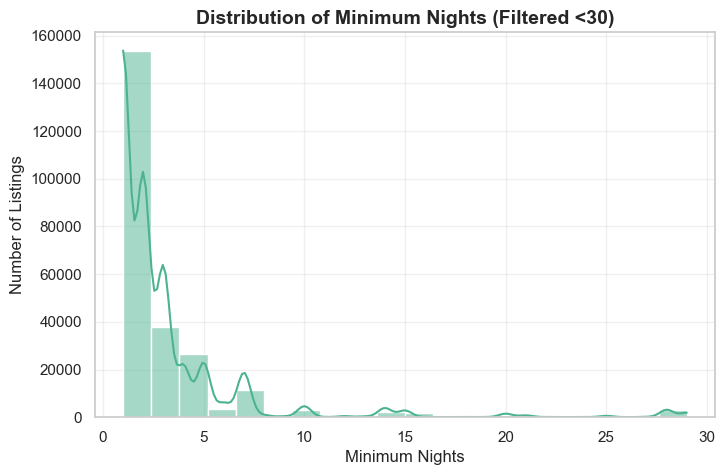

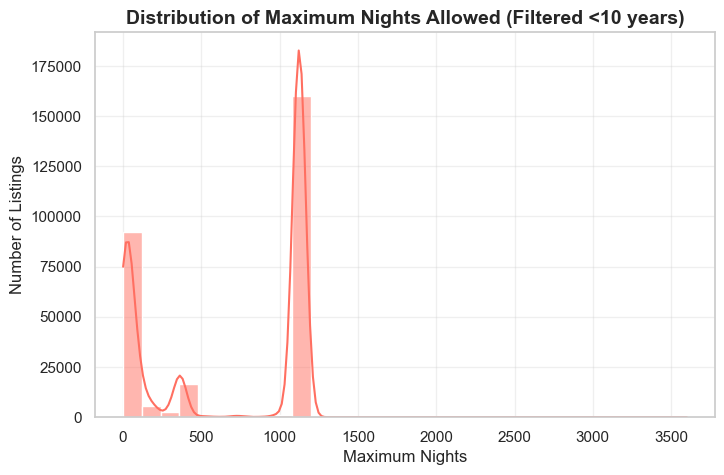

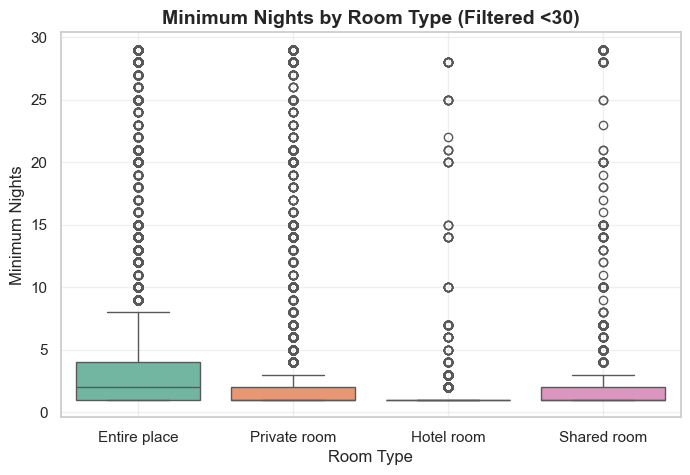

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['minimum_nights'] < 30]['minimum_nights'], bins=20, kde=True, color='#4CB391')
plt.title("Distribution of Minimum Nights (Filtered <30)", fontsize=14, weight='bold')
plt.xlabel("Minimum Nights", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df[df['maximum_nights'] < 3650]['maximum_nights'], bins=30, kde=True, color='#FF6F61')
plt.title("Distribution of Maximum Nights Allowed (Filtered <10 years)", fontsize=14, weight='bold')
plt.xlabel("Maximum Nights", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

# --- Minimum Nights by Room Type ---
plt.figure(figsize=(8,5))
sns.boxplot(
    x='room_type', 
    y='minimum_nights', 
    data=df[df['minimum_nights'] < 30], 
    hue='room_type', 
    palette='Set2', 
    legend=False
)
plt.title("Minimum Nights by Room Type (Filtered <30)", fontsize=14, weight='bold')
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Minimum Nights", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


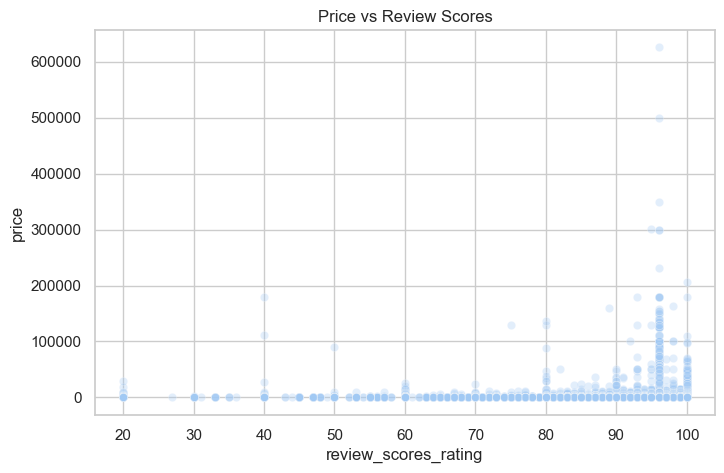

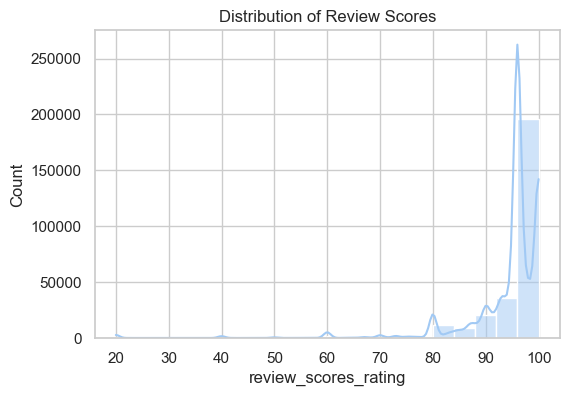

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='review_scores_rating', y='price', data=df, alpha=0.3)
plt.title("Price vs Review Scores")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['review_scores_rating'], bins=20, kde=True)
plt.title("Distribution of Review Scores")
plt.show()


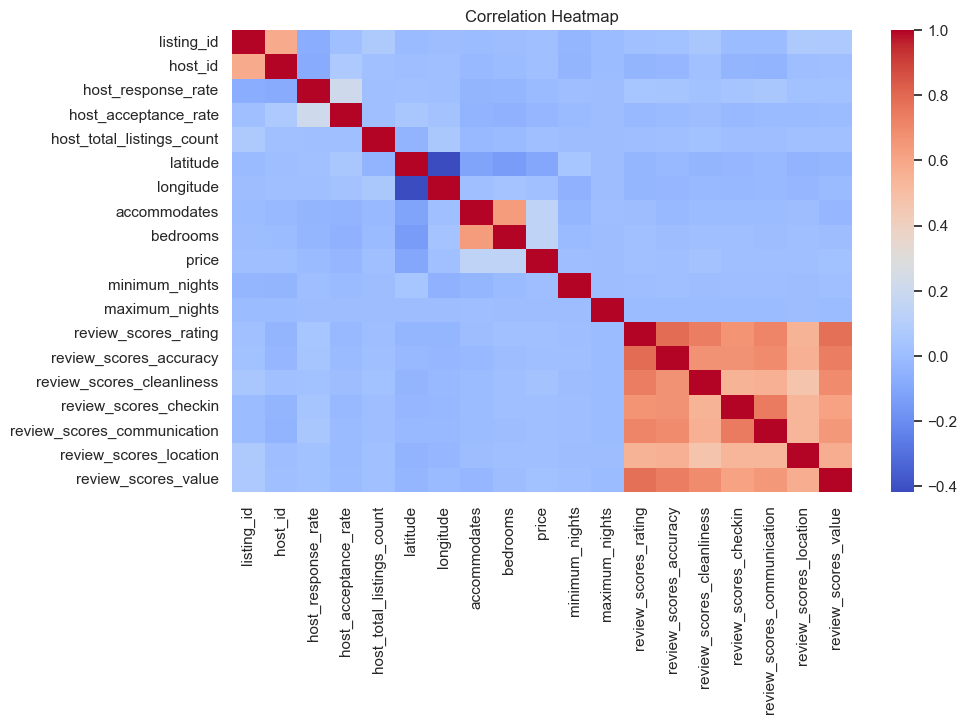

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()